In [1]:
import urllib
from urllib import request
import requests
import csv

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from xml.etree import cElementTree as ET 
from bs4 import BeautifulSoup
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

In [2]:
#!pip install scipy

In [2]:
from scipy.stats import ttest_ind
import seaborn as sns

In [3]:
# 보건복지부_코로나19 확진자 성별 연령별 현황

sv_key ="ENdJ67X0/9dtrA0/F3/coohsMZEtnO2vmKZm2G0uxJPcpqO8mhTQii+vnwJOxGiPjFgnzfZD49HT4ZR97uyGLw=="
url = 'http://apis.data.go.kr/1352000/ODMS_COVID_05/callCovid05Api'
params ={'serviceKey' : sv_key, 'numOfRows' : '100', 'apiType' : 'JSON'}

page_no = 1 
page_list = []
while True:
    print(page_no)
    params ['pageNo'] = page_no
    response = requests.get(url, params=params)
    rescode = response.status_code # 응답 코드 읽기

    # print(rescode)
    # print(response.content)

    if(rescode==200): # 200 : 정상응답
        temp_dict = response.json() # json 결과를 읽어서 dict로 변환
        page_list= page_list + temp_dict['items']
        if len(page_list) == temp_dict['totalCount']:
            break
        page_no=page_no +1 
    else:
        print("Error Code:" + str(rescode))
        break


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


In [78]:
print(f"전체 데이터 개수: {len(page_list)}")

전체 데이터 개수: 14916


In [79]:
covid_age_gender=pd.DataFrame(page_list)
covid_age_gender

,criticalRate,death,deathRate,confCaseRate,createDt,confCase,gubun
0,5.26,600,28.24,5.37,2021-08-09,11409,70-79
1,5.41,591,28.37,5.95,2021-07-28,10922,70-79
2,2.94,1,100.00,41.46,2020-02-20,34,남성
3,0.07,15,0.78,15.00,2021-05-24,20474,40-49
4,1.68,275,52.28,47.72,2020-11-30,16321,남성
...,...,...,...,...,...,...,...
14911,0.1,17741,50.7,53.84,2023-06-22,17270841,여성
14912,0,165,0.46,14.69,2023-08-15,4987756,30-39
14913,0.00,0,0.00,5.49,2020-07-29,782,10-19
14914,0.00,0,0.00,1.71,2020-07-27,243,0-9


In [80]:
new_column_names = {
    'criticalRate': '치명률',
    'death': '사망자수',
    'deathRate': '사망률',
    'confCaseRate': '확진률',
    'createDt': '등록일자',
    'confCase': '확진자수',
    'gubun': '연령,성별'
    
}

# 컬럼 이름 변경
covid_age_gender.rename(columns=new_column_names, inplace=True)

# 결과 출력
covid_age_gender

,치명률,사망자수,사망률,확진률,등록일자,확진자수,"연령,성별"
0,5.26,600,28.24,5.37,2021-08-09,11409,70-79
1,5.41,591,28.37,5.95,2021-07-28,10922,70-79
2,2.94,1,100.00,41.46,2020-02-20,34,남성
3,0.07,15,0.78,15.00,2021-05-24,20474,40-49
4,1.68,275,52.28,47.72,2020-11-30,16321,남성
...,...,...,...,...,...,...,...
14911,0.1,17741,50.7,53.84,2023-06-22,17270841,여성
14912,0,165,0.46,14.69,2023-08-15,4987756,30-39
14913,0.00,0,0.00,5.49,2020-07-29,782,10-19
14914,0.00,0,0.00,1.71,2020-07-27,243,0-9


In [81]:
# 기존 ['연령,성별'] 컬럼을 ['연령'], ['성별'] 컬럼으로 분리 
covid_age_gender['연령'] = covid_age_gender['연령,성별'].apply(lambda x: x if ('-' in x or '이상' in str(x)) else None)
covid_age_gender['성별'] = covid_age_gender['연령,성별'].apply(lambda x: x if ('-' not in x and '이상' not in str(x)) else None)

# 기존 컬럼 제거
covid_age_gender.drop(columns=['연령,성별'], inplace=True)

In [82]:
covid_age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14916 entries, 0 to 14915
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   치명률     14916 non-null  object
 1   사망자수    14916 non-null  object
 2   사망률     14916 non-null  object
 3   확진률     14916 non-null  object
 4   등록일자    14916 non-null  object
 5   확진자수    14916 non-null  object
 6   연령      12204 non-null  object
 7   성별      2712 non-null   object
dtypes: object(8)
memory usage: 932.4+ KB


In [83]:
covid_age_gender.columns

Index(['치명률', '사망자수', '사망률', '확진률', '등록일자', '확진자수', '연령', '성별'], dtype='object')

In [ ]:
#covid_age_gender['치명률'] = covid_age_gender['치명률'].map(lambda v: 0 if v == '' else float(v.replace('%', '')))
#covid_age_gender['치명률'].dtype

AttributeError: 'float' object has no attribute 'replace'

In [ ]:

# ''값을 0값으로 변환 (평균계산)
cols_to_fix = ['치명률', '사망자수', '사망률']

# 각 컬럼에서 '' 값을 0으로 변환
covid_age_gender[cols_to_fix] = covid_age_gender[cols_to_fix].replace('',0)

In [85]:
# 날짜 변환
covid_age_gender['등록일자'] = pd.to_datetime(covid_age_gender['등록일자'])

# 소수점 있는 값들은 float로 변환 (소수점 그대로 유지)
covid_age_gender['치명률'] = pd.to_numeric(covid_age_gender['치명률'], errors='coerce')
covid_age_gender['사망률'] = pd.to_numeric(covid_age_gender['사망률'], errors='coerce')
covid_age_gender['확진률'] = pd.to_numeric(covid_age_gender['확진률'], errors='coerce')
covid_age_gender['사망자수'] = pd.to_numeric(covid_age_gender['사망자수'], errors='coerce')
covid_age_gender['확진자수'] = pd.to_numeric(covid_age_gender['확진자수'], errors='coerce')


In [87]:
covid_age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14916 entries, 0 to 14915
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   치명률     14883 non-null  float64       
 1   사망자수    14916 non-null  int64         
 2   사망률     14916 non-null  float64       
 3   확진률     14916 non-null  float64       
 4   등록일자    14916 non-null  datetime64[ns]
 5   확진자수    14916 non-null  int64         
 6   연령      12204 non-null  object        
 7   성별      2712 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 932.4+ KB


In [ ]:
# covid_age_gender['등록일자'] = pd.to_datetime(covid_age_gender['등록일자'], errors='coerce')

# # # 등록일자 기준으로 정렬
# df_sorted = covid_age_gender.sort_values(by='등록일자')

# # # 정렬된 데이터 CSV로 저장
# df_sorted.to_csv("covid_age_gender.csv", index=False, encoding='utf-8-sig')

In [89]:
df_gender = covid_age_gender[covid_age_gender['성별'].notna()] #notna :  결측치가 아닌 값 

# 남성과 여성 각각의 사망률 평균 계산
남성_사망률 = df_gender[df_gender['성별'] == '남성']['사망률'].mean()
여성_사망률 = df_gender[df_gender['성별'] == '여성']['사망률'].mean()

print(f"남성 평균 사망률: {남성_사망률:.2f}")
print(f"여성 평균 사망률: {여성_사망률:.2f}")


남성 평균 사망률: 58.08
여성 평균 사망률: 57.40


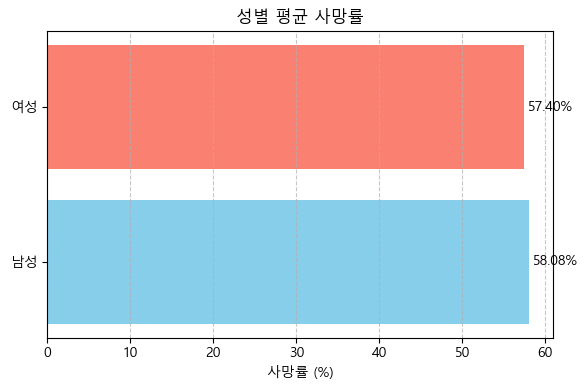

In [90]:

avg_death_rate = pd.Series([남성_사망률, 여성_사망률], index=['남성', '여성'])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# 차트 그리기
plt.figure(figsize=(6, 4))
bars = plt.barh(avg_death_rate.index, avg_death_rate.values, color=['skyblue', 'salmon'])

# 수치 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', fontsize=10)

plt.title("성별 평균 사망률")
plt.xlabel("사망률 (%)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [91]:
df_gender = covid_age_gender[covid_age_gender['성별'].notna()]

# 남성과 여성 각각의 확진률 평균 계산
남성_확진률 = df_gender[df_gender['성별'] == '남성']['확진률'].mean()
여성_확진률 = df_gender[df_gender['성별'] == '여성']['확진률'].mean()

print(f"남성 평균 확진률: {남성_사망률:.2f}")
print(f"여성 평균 확진률: {여성_사망률:.2f}")

남성 평균 확진률: 58.08
여성 평균 확진률: 57.40


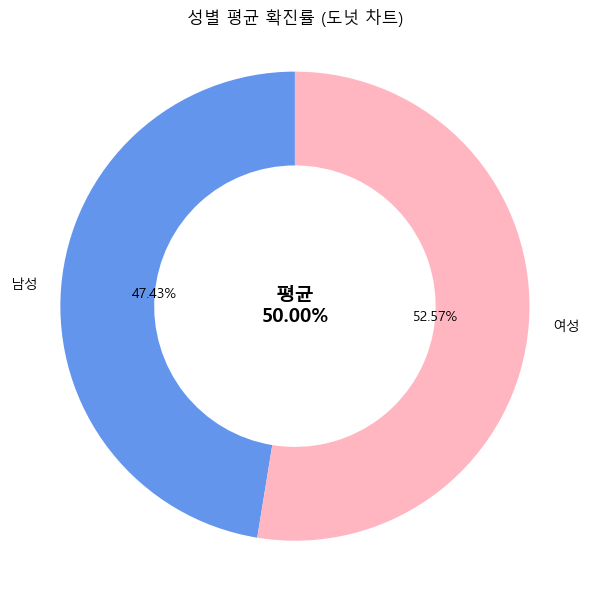

In [92]:
avg_confirm_rate = pd.Series([남성_확진률, 여성_확진률], index=['남성', '여성'])

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 도넛 차트
colors = ['cornflowerblue', 'lightpink']
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    avg_confirm_rate,
    labels=avg_confirm_rate.index,
    autopct='%.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)  # 도넛 효과
)

# 중앙 평균값 텍스트 추가
전체_평균 = avg_confirm_rate.mean()
plt.text(0, 0, f"평균\n{전체_평균:.2f}%", ha='center', va='center', fontsize=14, weight='bold')

plt.title("성별 평균 확진률 (도넛 차트)")
plt.axis('equal')
plt.tight_layout()
plt.show()


In [93]:
# 연령별 사망률 
df_age = covid_age_gender[covid_age_gender['연령'].notna()].copy()

age_death_rate = df_age.groupby('연령')['사망률'].mean().reset_index()

age_death_rate = age_death_rate.sort_values(by='연령')

print(age_death_rate)

      연령        사망률
0    0-9   0.063001
1  10-19   0.030774
2  20-29   0.197618
3  30-39   0.610192
4  40-49   1.471069
5  50-59   5.392330
6  60-69  14.648119
7  70-79  29.624063
8  80 이상  63.386726


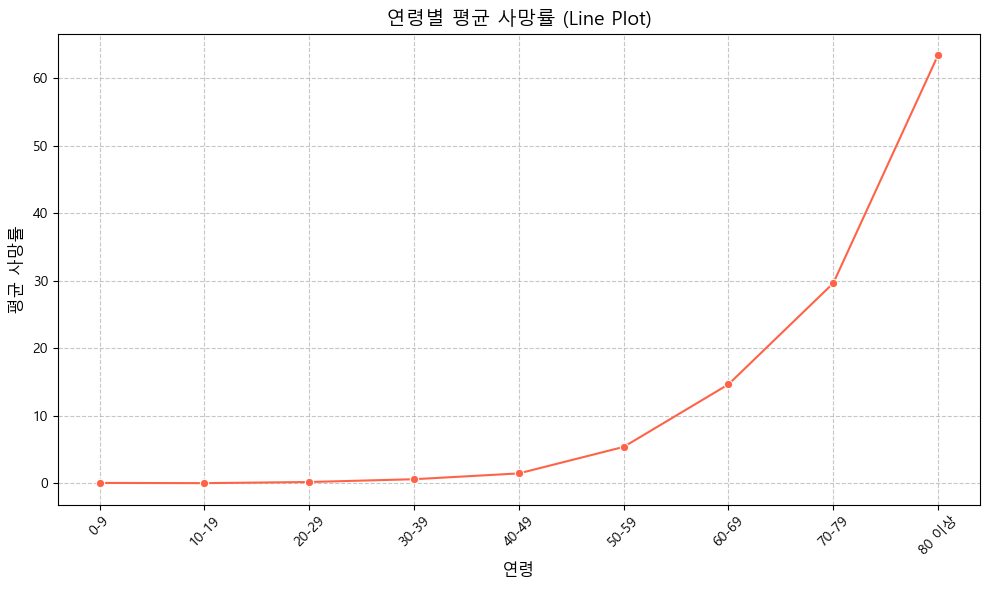

In [94]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_death_rate, x='연령', y='사망률', marker='o', color='tomato')

plt.title('연령별 평균 사망률 (Line Plot)', fontsize=14)
plt.xlabel('연령', fontsize=12)
plt.ylabel('평균 사망률', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

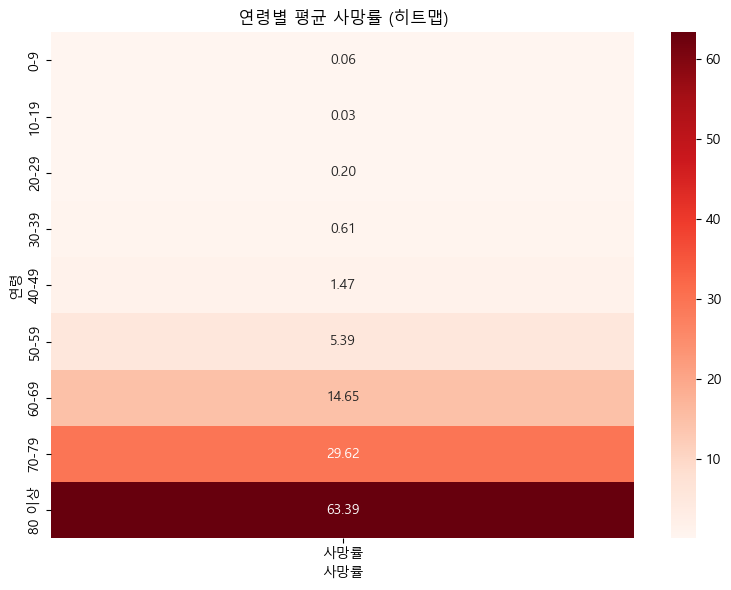

In [95]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 연령을 index로 설정 (1열짜리 히트맵)
heatmap_data = age_death_rate.set_index('연령')

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Reds")

plt.title("연령별 평균 사망률 (히트맵)")
plt.xlabel("사망률")
plt.ylabel("연령")
plt.tight_layout()
plt.show()

In [96]:
# 연령별 확진률
df_age = covid_age_gender[covid_age_gender['연령'].notna()].copy()

age_confirm_rate = df_age.groupby('연령')['확진률'].mean().reset_index()

age_confirm_rate = age_confirm_rate.sort_values(by='연령')

print(age_confirm_rate)

      연령        확진률
0    0-9   6.823540
1  10-19   9.402493
2  20-29  17.339506
3  30-39  14.328835
4  40-49  14.769447
5  50-59  15.876689
6  60-69  12.173156
7  70-79   5.844816
8  80 이상   3.461836


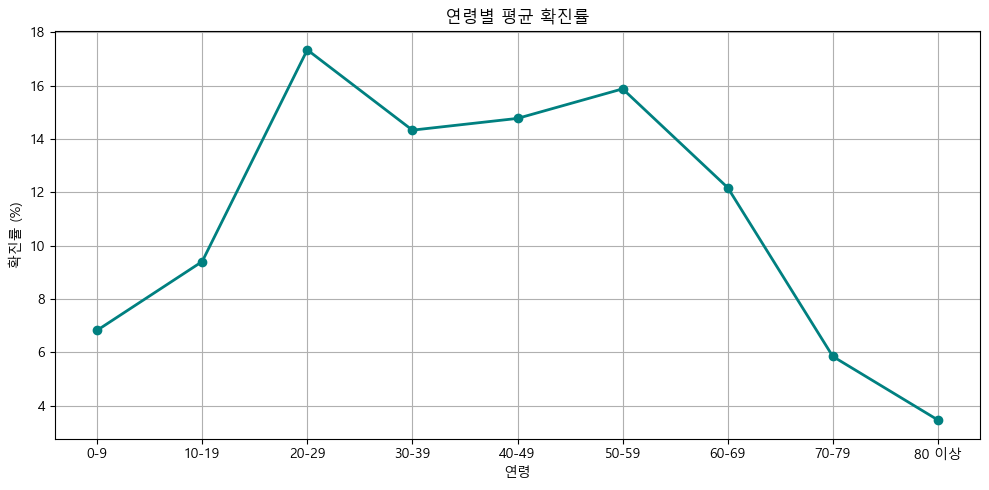

In [97]:
# 연령별 확진률 평균 계산
df_age = covid_age_gender[covid_age_gender['연령'].notna()].copy()
age_confirm_rate = df_age.groupby('연령')['확진률'].mean().reset_index()

# 연령 기준 정렬
age_confirm_rate = age_confirm_rate.sort_values(by='연령')

# 시각화 
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.figure(figsize=(10, 5))
plt.plot(age_confirm_rate['연령'], age_confirm_rate['확진률'], marker='o', color='teal', linewidth=2)

plt.title("연령별 평균 확진률")
plt.xlabel("연령")
plt.ylabel("확진률 (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
# 성별 및 사망률 결측치 제거
df_gender_test = covid_age_gender[
    covid_age_gender['성별'].notna() & 
    covid_age_gender['사망률'].notna()
]

# 남성/여성 사망률 리스트 추출
male_death = df_gender_test[df_gender_test['성별'] == '남성']['사망률']
female_death = df_gender_test[df_gender_test['성별'] == '여성']['사망률']

# 독립표본 t-검정 수행
t_stat, p_value = ttest_ind(male_death, female_death, equal_var=False)  # 등분산 가정 X

# 결과 출력
print(f"t-통계량: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("→ 성별에 따라 사망률 차이가 유의미함! 대립가설 채택 ✅")
else:
    print("→ 성별에 따른 사망률 차이 없음. 귀무가설 채택 💤")

t-통계량: 0.046
p-value: 0.9634
→ 성별에 따른 사망률 차이 없음. 귀무가설 채택 💤


C:\Users\human\AppData\Local\Temp\ipykernel_12676\174591803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=gender_death_df, x='성별', y='사망률', palette='Set2', size=4)
d:\apps\miniconda3\envs\python-env-311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 94.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\apps\miniconda3\envs\python-env-311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 96.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


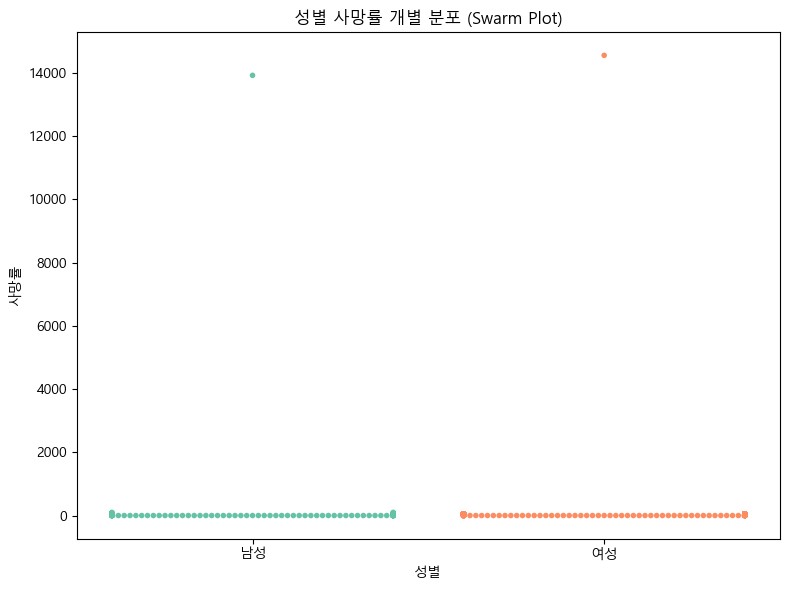

In [106]:
# 성별 t 검정 시각화 

plt.figure(figsize=(8, 6))
sns.swarmplot(data=gender_death_df, x='성별', y='사망률', palette='Set2', size=4)
plt.title('성별 사망률 개별 분포 (Swarm Plot)')
plt.tight_layout()
plt.show()

C:\Users\human\AppData\Local\Temp\ipykernel_12676\3135975787.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


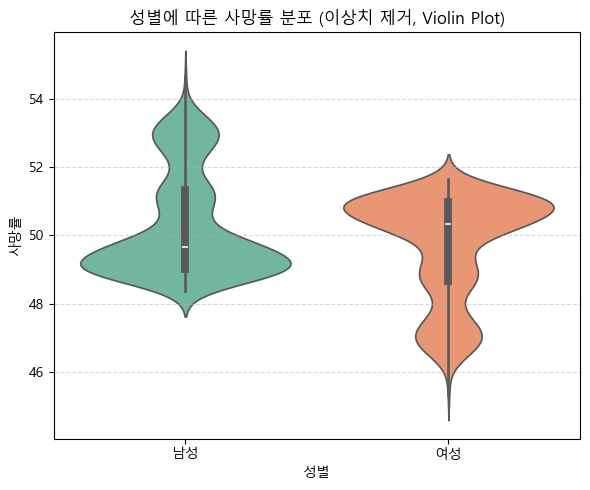

In [39]:
# 성별/사망률 결측치 제거
df_gender_test = covid_age_gender[
    covid_age_gender['성별'].notna() &
    covid_age_gender['사망률'].notna()
].copy()

# IQR 기반 이상치 제거 함수 정의
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# 성별별로 이상치 제거 적용
male_df = remove_outliers_iqr(df_gender_test[df_gender_test['성별'] == '남성'], '사망률')
female_df = remove_outliers_iqr(df_gender_test[df_gender_test['성별'] == '여성'], '사망률')

# 병합
df_no_outliers = pd.concat([male_df, female_df])

plt.figure(figsize=(6, 5))
sns.violinplot(
    x='성별',
    y='사망률',
    data=df_no_outliers,
    palette='Set2',
    inner='box'
)

plt.title("성별에 따른 사망률 분포 (이상치 제거, Violin Plot)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 남성과 여성 모두 평균적으로 48-51 사이의 사망률 높음
# 성별에 따라 사망률 차이가 없다는 가설에 부합 


In [41]:
# 귀무가설 : 연령과 사망률은 관계가 없다. 
# 대립가설 : 연령이 높을수록 사망률이 높다 채택 


# 연령과 사망률 모두 숫자로 정제
df_corr = covid_age_gender[
    covid_age_gender['연령'].notna() & 
    covid_age_gender['사망률'].notna()
].copy()

# '연령'이 문자라면 숫자로 변환 (예: '80대' → 80)
df_corr['연령'] = df_corr['연령'].str.extract('(\d+)').astype(float)

# 피어슨 상관계수 및 p-value 계산
corr, p_value = pearsonr(df_corr['연령'], df_corr['사망률'])

print(f"피어슨 상관계수: {corr:.3f}")
print(f"p-value: {p_value:.4f}")

# 유의수준 0.05 기준으로 해석
if p_value < 0.05:
    print("→ 유의미한 상관관계가 있음! 대립가설 채택 가능 ✅")
else:
    print("→ 유의미한 관계 없음. 귀무가설 채택 💤")

피어슨 상관계수: 0.097
p-value: 0.0000
→ 유의미한 상관관계가 있음! 대립가설 채택 가능 ✅


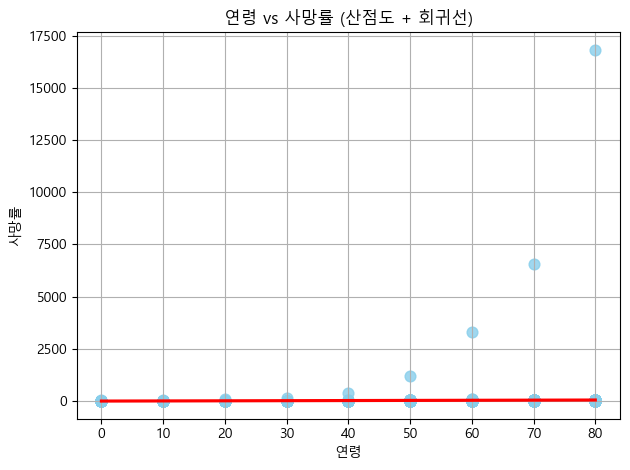

In [42]:
# 연령, 사망률 결측치 제거
df_corr = covid_age_gender[
    covid_age_gender['연령'].notna() & 
    covid_age_gender['사망률'].notna()
].copy()

# '연령' 컬럼 숫자로 변환 (예: '80대' → 80)
df_corr['연령'] = df_corr['연령'].str.extract('(\d+)').astype(float)

# 회귀선 포함 산점도
sns.regplot(
    data=df_corr,
    x='연령',
    y='사망률',
    scatter_kws={'color': 'skyblue', 's': 60},
    line_kws={'color': 'red'}
)

plt.title("연령 vs 사망률 (산점도 + 회귀선)")
plt.xlabel("연령")
plt.ylabel("사망률")
plt.grid(True)
plt.tight_layout()
plt.show()

(10789, 8)


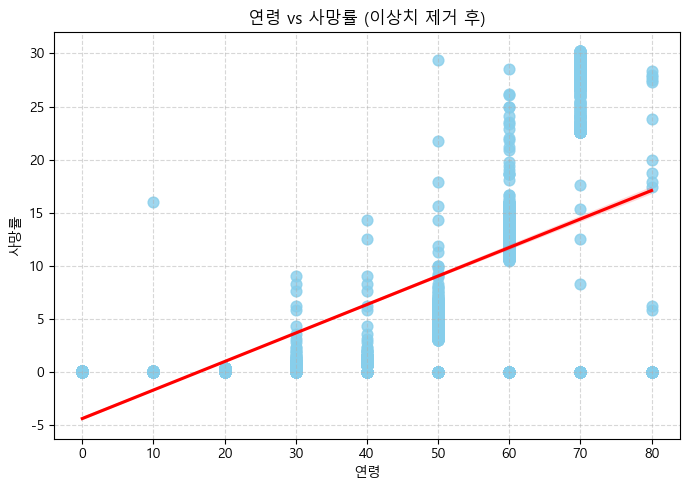

In [43]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_corr_clean = remove_outliers_iqr(df_corr, '사망률')
print(df_corr_clean.shape)  # 이상치 제거 후 행 개수 확인

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.regplot(
    data=df_corr_clean,
    x='연령',
    y='사망률',
    scatter_kws={'color': 'skyblue', 's': 60},
    line_kws={'color': 'red'}
)

plt.title("연령 vs 사망률 (이상치 제거 후)")
plt.xlabel("연령")
plt.ylabel("사망률")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
